## Import Necssary Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import load_data, clean_data, plot_time_series, plot_monthly_boxplots, plot_hourly_trends, save_clean_data

## Summary Statistics and Missing-Value Report

In [2]:


try:
    # Load the dataset using utility function (no need to specify 'data/' in path)
    df = load_data('togo-dapaong_qc.csv')
    print('--' * 20)
    print('The first 5 rows of the dataset:')
    display(df.head())
    print('--' * 20)
    # Data Shape and Size
    print("\nDataFrame Shape:", df.shape)

    # Descriptive Statistics for Key Variables
    key_variables = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb', 'RH']
    print("\nDescriptive Statistics for Key Variables:")
    display(df[key_variables].describe())
    print('--' * 20)
    
    print('\nTime Range Analysis:')
    print('Earliest Timestamp:', df['Timestamp'].min())
    print('Latest Timestamp:', df['Timestamp'].max())
    print('--' * 20)
    print('Check for missing values:')
    print(df.isna().sum())
except FileNotFoundError:
    print("Error: The file 'togo-dapaong_qc.csv' was not found in the data folder.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except pd.errors.ParserError:
    print("Error: The file could not be parsed.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

----------------------------------------
The first 5 rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


----------------------------------------

DataFrame Shape: (525600, 19)

Descriptive Statistics for Key Variables:


,GHI,DNI,DHI,ModA,ModB,WS,WSgust,Tamb,RH
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,230.555040,151.258469,116.444352,226.144375,219.568588,2.368093,3.229490,27.751788,55.013160
std,322.532347,250.956962,156.520714,317.346938,307.932510,1.462668,1.882565,4.758023,28.778732
min,-12.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,1.400000,1.900000,24.200000,26.500000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,2.200000,2.900000,27.200000,59.300000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,3.200000,4.400000,31.100000,80.800000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,16.100000,23.100000,41.400000,99.800000


----------------------------------------

Time Range Analysis:
Earliest Timestamp: 2021-10-25 00:01:00
Latest Timestamp: 2022-10-25 00:00:00
----------------------------------------
Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


## Outlier Detection


In [3]:
# Clean data using utility function
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_clean = clean_data(df, key_columns)
print(f"Cleaned data shape: {df_clean.shape}")
save_clean_data(df_clean, 'togo_clean.csv')

Cleaned data shape: (516349, 19)
Cleaned data exported to '../data/togo_clean.csv'.
Cleaned data exported to '../data/togo_clean.csv'.


## Time Series Analysis

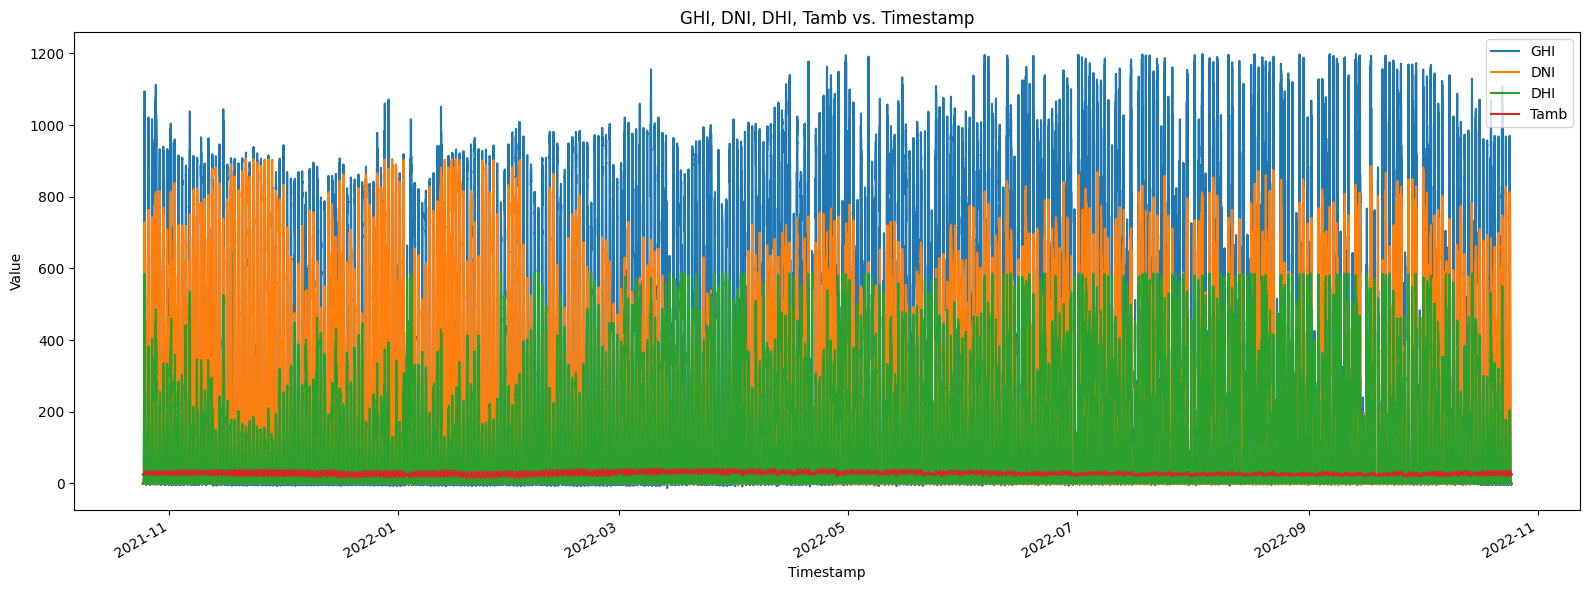

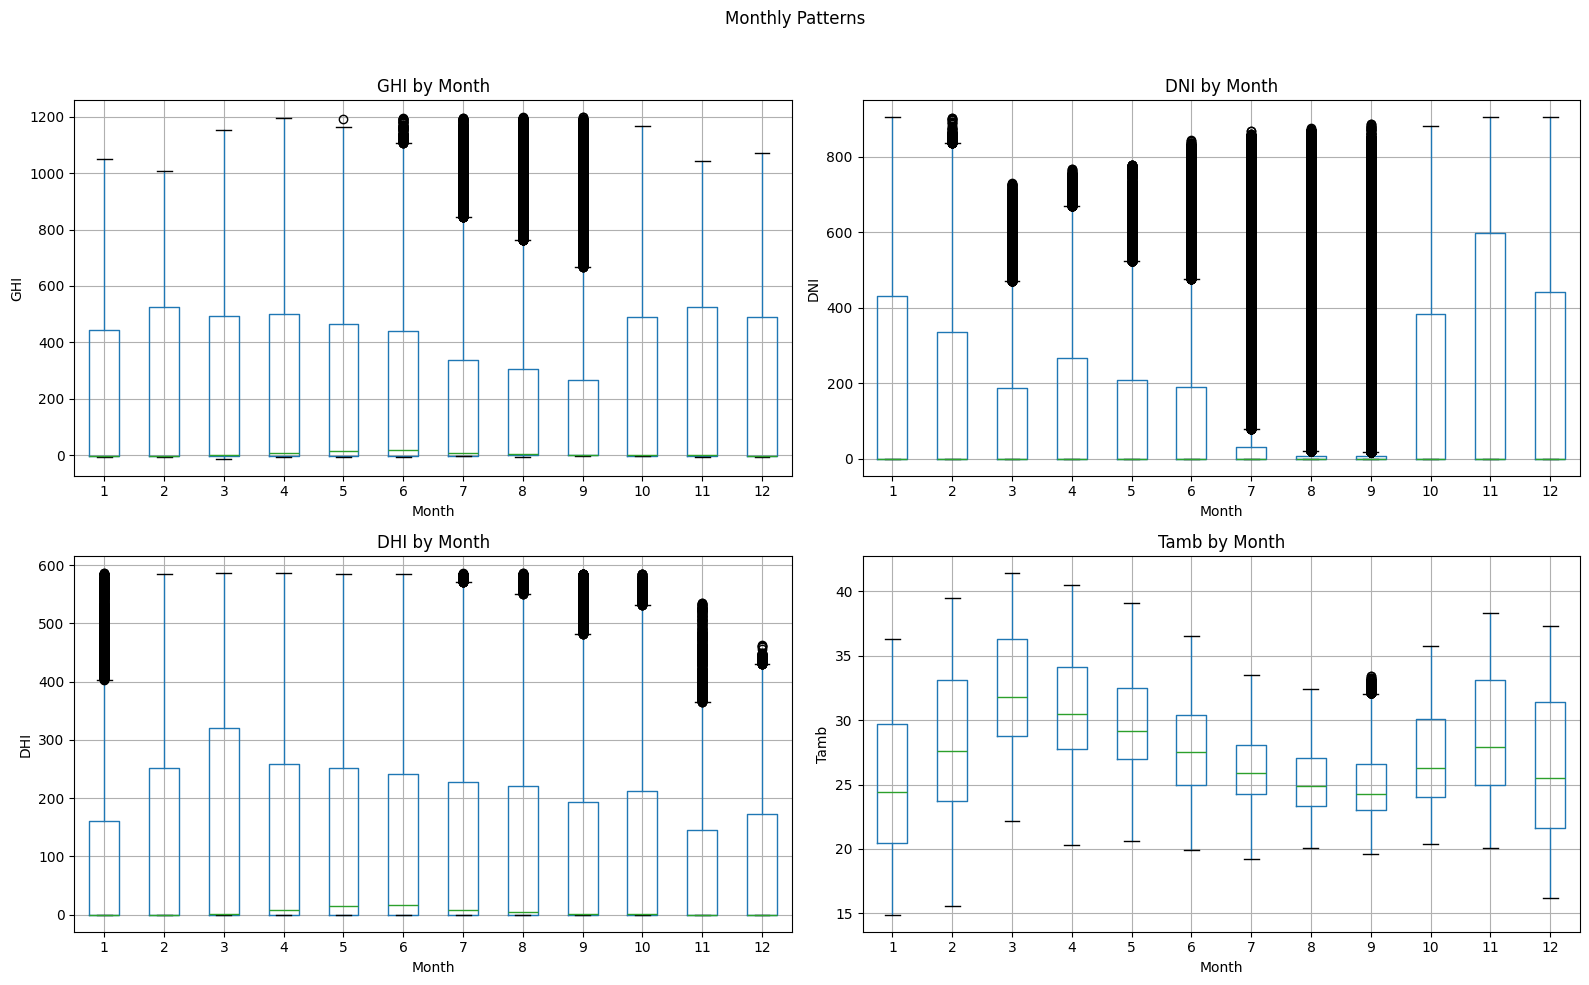

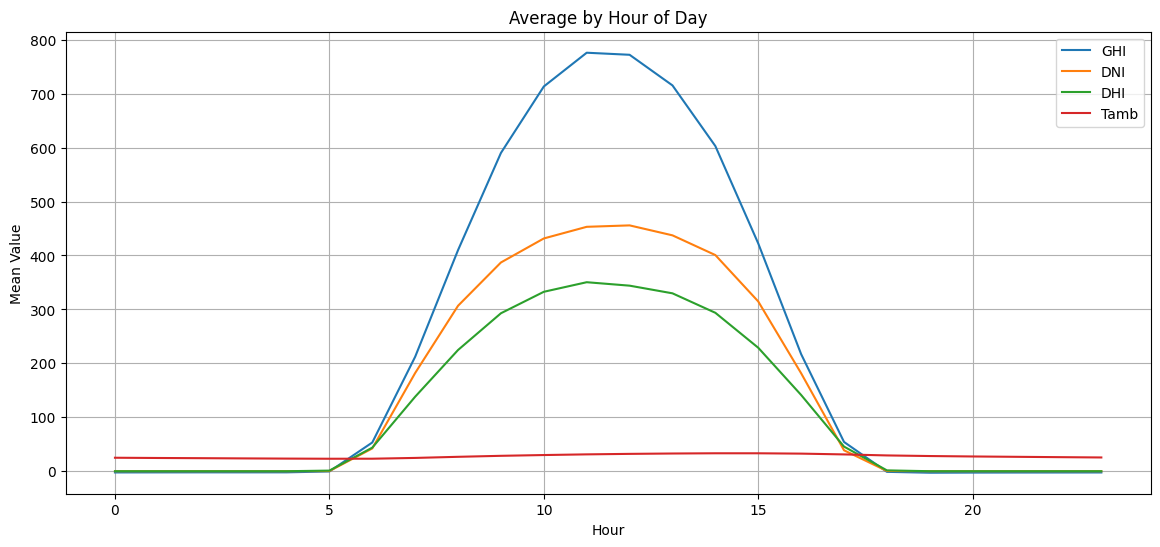

In [4]:
# Time Series and Boxplot Analysis using modular functions
plot_time_series(df_clean, ['GHI', 'DNI', 'DHI', 'Tamb'], 'GHI, DNI, DHI, Tamb vs. Timestamp')
plot_monthly_boxplots(df_clean, ['GHI', 'DNI', 'DHI', 'Tamb'])
plot_hourly_trends(df_clean, ['GHI', 'DNI', 'DHI', 'Tamb'])

## Cleaning Impact

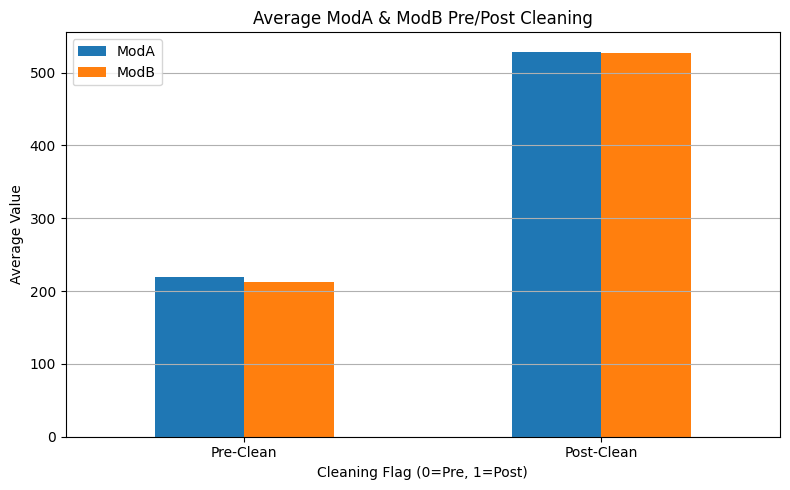

In [5]:
# Group by 'Cleaning' flag and calculate mean for ModA and ModB
cleaning_means = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot the results
cleaning_means.plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA & ModB Pre/Post Cleaning')
plt.xlabel('Cleaning Flag (0=Pre, 1=Post)')
plt.ylabel('Average Value')
plt.xticks([0, 1], ['Pre-Clean', 'Post-Clean'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Correlation & Relationship Analysis

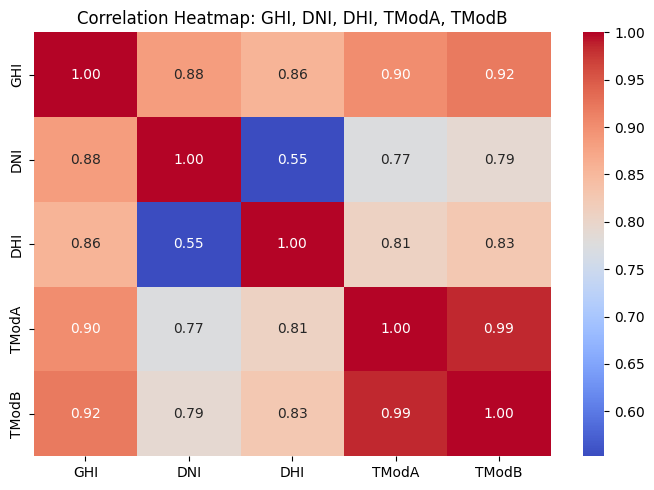

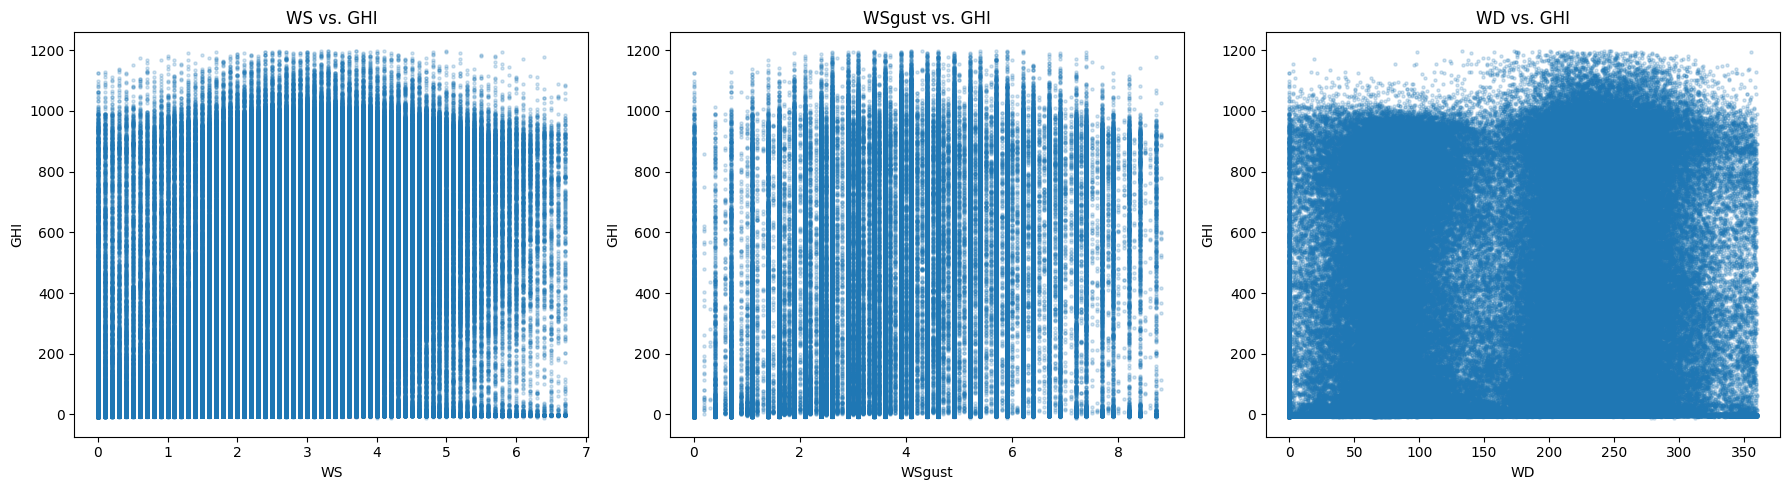

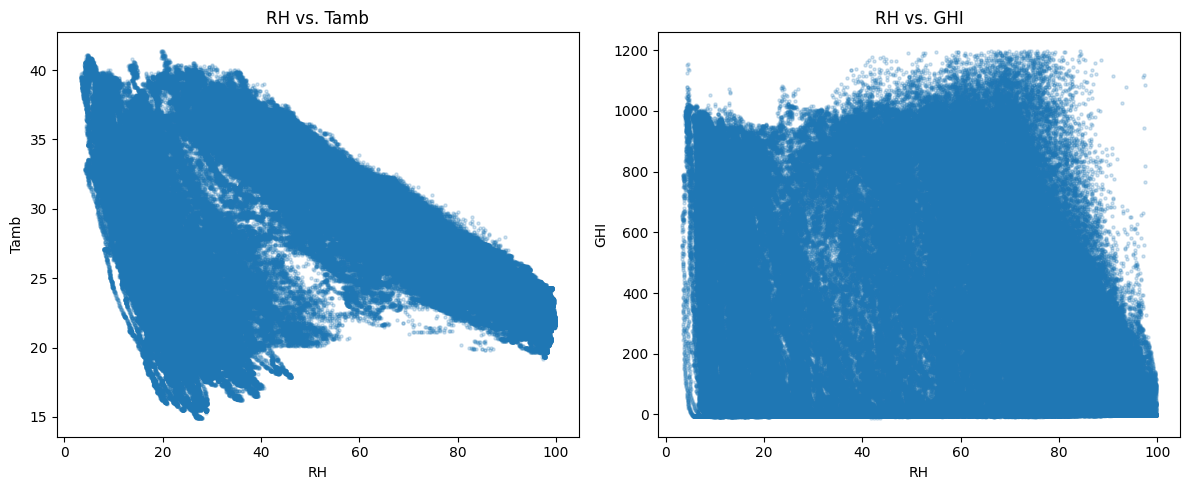

In [6]:
import seaborn as sns

# 1. Correlation heatmap for selected columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[corr_cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: GHI, DNI, DHI, TModA, TModB')
plt.tight_layout()
plt.show()

# 2. Scatter plots: WS, WSgust, WD vs. GHI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col in zip(axes, ['WS', 'WSgust', 'WD']):
    ax.scatter(df_clean[col], df_clean['GHI'], alpha=0.2, s=5)
    ax.set_xlabel(col)
    ax.set_ylabel('GHI')
    ax.set_title(f'{col} vs. GHI')
plt.tight_layout()
plt.show()

# 3. Scatter plots: RH vs. Tamb and RH vs. GHI
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.2, s=5)
axes[0].set_xlabel('RH')
axes[0].set_ylabel('Tamb')
axes[0].set_title('RH vs. Tamb')

axes[1].scatter(df_clean['RH'], df_clean['GHI'], alpha=0.2, s=5)
axes[1].set_xlabel('RH')
axes[1].set_ylabel('GHI')
axes[1].set_title('RH vs. GHI')

plt.tight_layout()
plt.show()

## Wind & Distribution Analysis

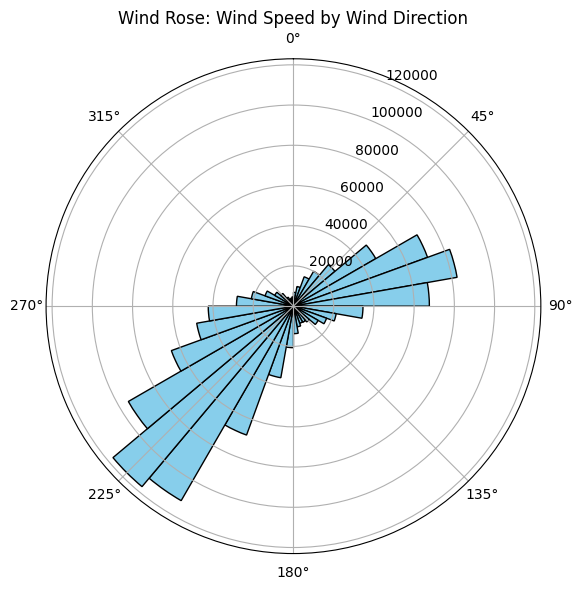

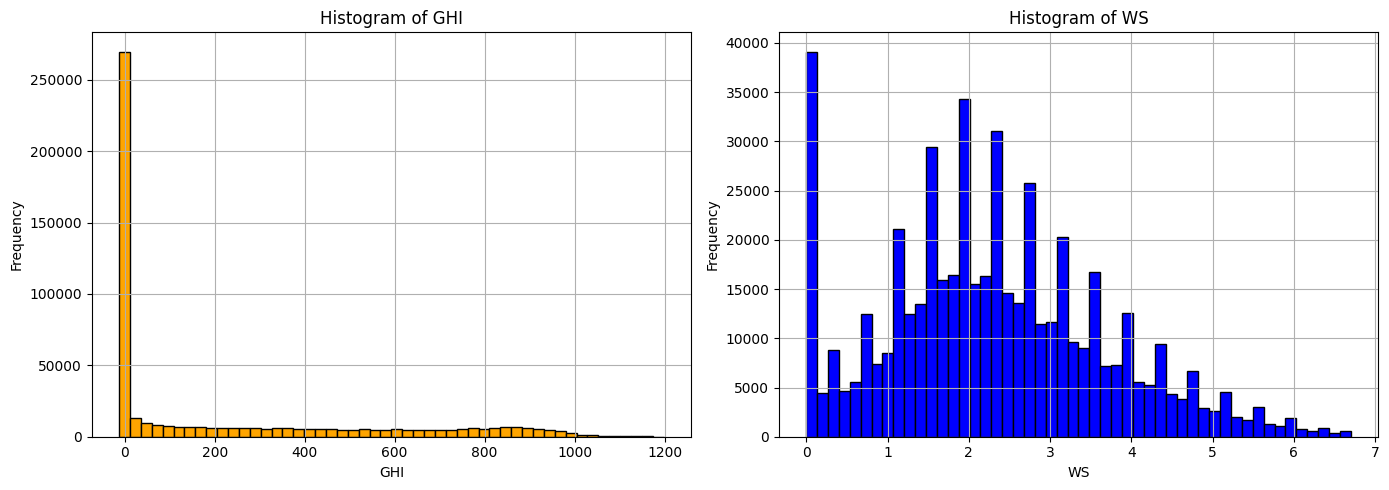

In [9]:
from matplotlib.projections import PolarAxes

# Wind rose (radial bar plot) for WS (wind speed) and WD (wind direction)

# Prepare wind direction in radians and wind speed
wd_rad = np.deg2rad(df_clean['WD'])
ws = df_clean['WS']

# Bin wind direction into 36 bins (every 10 degrees)
wd_bins = np.linspace(0, 360, 37)
ws_bins = np.linspace(ws.min(), ws.max(), 7)

# Create wind rose using matplotlib
fig_windrose = plt.figure(figsize=(8, 6))
ax_windrose = plt.subplot(111, polar=True)
bars = ax_windrose.hist(wd_rad, bins=wd_bins.size-1, weights=ws, color='skyblue', edgecolor='k')
ax_windrose.set_theta_zero_location('N')
ax_windrose.set_theta_direction(-1)
ax_windrose.set_title('Wind Rose: Wind Speed by Wind Direction')
plt.tight_layout()
plt.show()

# Histograms for GHI and WS
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df_clean['GHI'].hist(ax=axes[0], bins=50, color='orange', edgecolor='black')
axes[0].set_title('Histogram of GHI')
axes[0].set_xlabel('GHI')
axes[0].set_ylabel('Frequency')

df_clean['WS'].hist(ax=axes[1], bins=50, color='blue', edgecolor='black')
axes[1].set_title('Histogram of WS')
axes[1].set_xlabel('WS')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Temperature Analysis

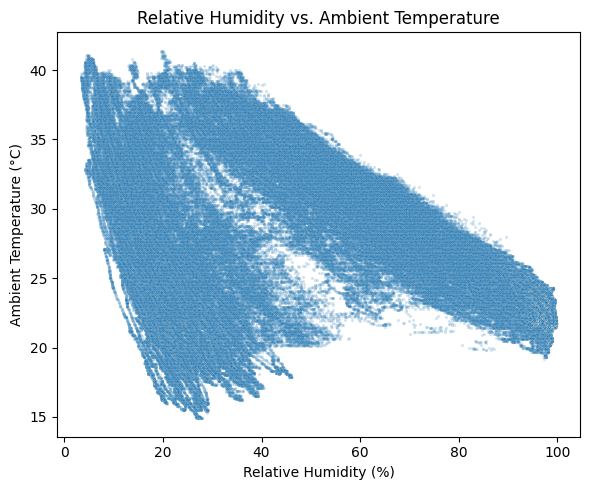

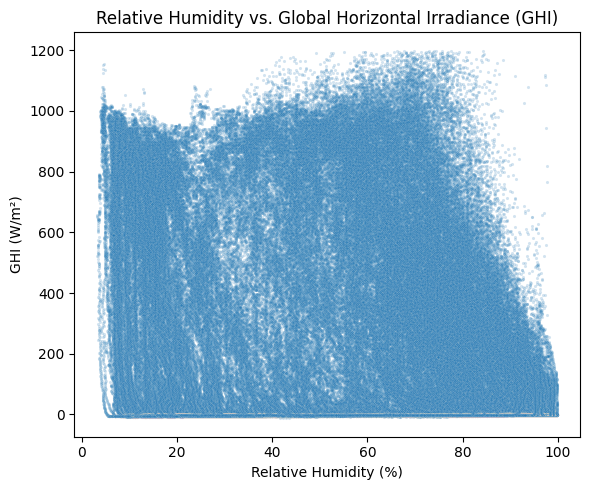

Correlation between RH and Tamb: -0.395
Correlation between RH and GHI: -0.248


In [10]:
import seaborn as sns

# Analyze the relationship between Relative Humidity (RH), Temperature (Tamb), and Solar Radiation (GHI)

# 1. Scatter plot: RH vs. Tamb
plt.figure(figsize=(6, 5))
sns.scatterplot(x='RH', y='Tamb', data=df_clean, alpha=0.2, s=5)
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()

# 2. Scatter plot: RH vs. GHI
plt.figure(figsize=(6, 5))
sns.scatterplot(x='RH', y='GHI', data=df_clean, alpha=0.2, s=5)
plt.title('Relative Humidity vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()

# 3. Correlation coefficients
corr_rh_tamb = df_clean['RH'].corr(df_clean['Tamb'])
corr_rh_ghi = df_clean['RH'].corr(df_clean['GHI'])
print(f"Correlation between RH and Tamb: {corr_rh_tamb:.3f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.3f}")

## Bubble Chart

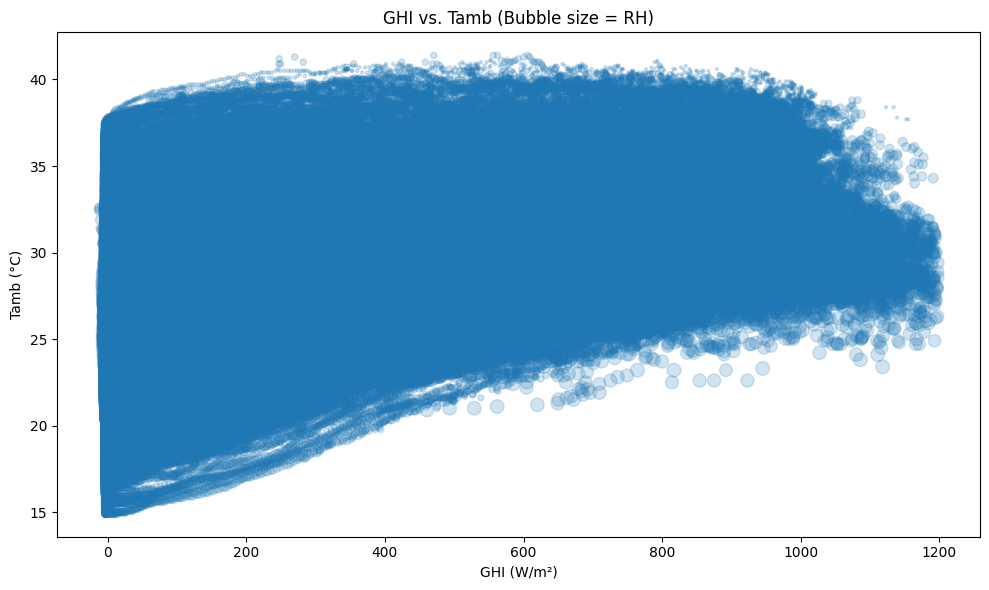

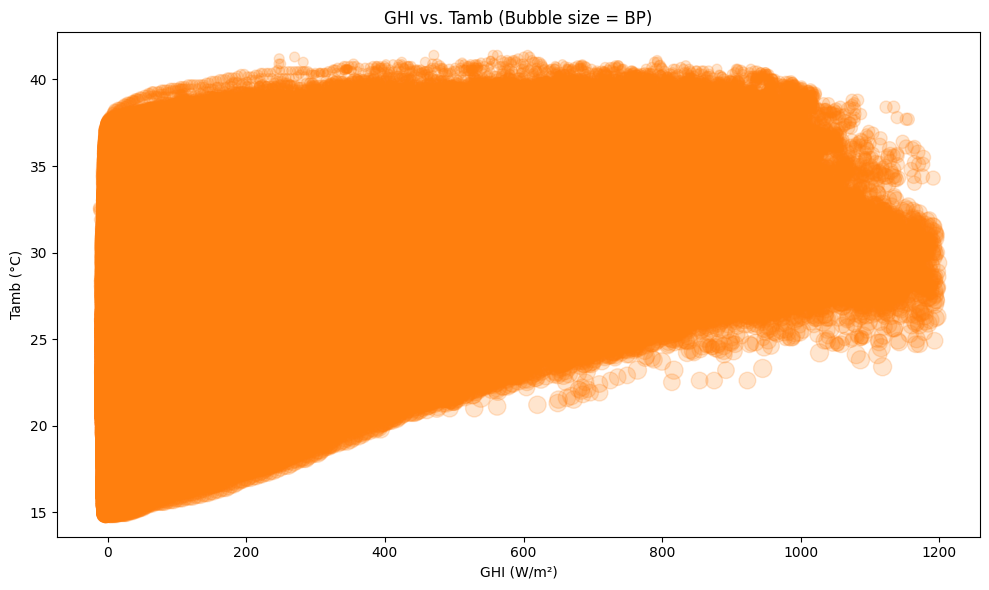

In [11]:
# Bubble chart: GHI vs. Tamb, bubble size by RH and BP

plt.figure(figsize=(10, 6))

# Bubble size by RH (Relative Humidity)
plt.scatter(df_clean['GHI'], df_clean['Tamb'], 
            s=df_clean['RH'],  # size by RH
            alpha=0.2, c='tab:blue', label='Bubble size = RH')

plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('GHI vs. Tamb (Bubble size = RH)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

# Bubble size by BP (Barometric Pressure)
plt.scatter(df_clean['GHI'], df_clean['Tamb'], 
            s=(df_clean['BP'] - df_clean['BP'].min()) / (df_clean['BP'].max() - df_clean['BP'].min()) * 200 + 10,  # scaled BP
            alpha=0.2, c='tab:orange', label='Bubble size = BP')

plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('GHI vs. Tamb (Bubble size = BP)')
plt.tight_layout()
plt.show()